In [1]:
import numpy as np
import pandas as pd
import matplotlib as mlb
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.use("Agg")
from scipy.stats import gaussian_kde
import sys
#import MDAnalysis as mda
#from MDAnalysis.tests.datafiles import PSF, DCD
#from MDAnalysis.analysis import pca, align
import pytraj as pt
import seaborn as sns
#import nglview as nv
#import warnings
# suppress some MDAnalysis warnings about writing PDB files
#warnings.filterwarnings('ignore')
#from prody import *
from pylab import *
ion()

## Reading trajectories and RMSD files

In [3]:
#Reading RMSD files
#Active protein RMSD
dimer_3b3f_rmsd = pd.read_csv('../3b3f/dimer/analysis/3b3f_dimer_pro_rmsd.dat', sep='\t', header=None)
monomer_3b3f_rmsd = pd.read_csv('../3b3f/monomer/analysis/3b3f_monomer_pro_rmsd.dat', sep='\t', header=None)
#Inactive protein RMSD  
dimer_3b3j_rmsd = pd.read_csv('../3b3j/dimer/analysis/3b3j_dimer_pro_rmsd.dat', sep='\t', header=None)
monomer_3b3j_rmsd = pd.read_csv('../3b3j/monomer/analysis/3b3j_monomer_pro_rmsd.dat', sep='\t', header=None)
#Assigning df columns
dimer_3b3f_rmsd[['Frame', 'perres']] = dimer_3b3f_rmsd[0].str.split(expand=True)
monomer_3b3f_rmsd[['Frame', 'perres']] = monomer_3b3f_rmsd[0].str.split(expand=True)
dimer_3b3j_rmsd[['Frame', 'perres']] = dimer_3b3j_rmsd[0].str.split(expand=True)
monomer_3b3j_rmsd[['Frame', 'perres']] = monomer_3b3j_rmsd[0].str.split(expand=True)

# Convert the 'Frame' and 'perres' columns to numeric
def convert_to_numeric(df):
    df['Frame'] = pd.to_numeric(df['Frame'], errors='coerce')
    df['perres'] = pd.to_numeric(df['perres'], errors='coerce')
    return df
dimer_3b3f_rmsd= convert_to_numeric(dimer_3b3f_rmsd)
monomer_3b3f_rmsd = convert_to_numeric(monomer_3b3f_rmsd)
dimer_3b3j_rmsd = convert_to_numeric(dimer_3b3j_rmsd)
monomer_3b3j_rmsd = convert_to_numeric(monomer_3b3j_rmsd)
# removing the first null rows
dimer_3b3f_rmsd = dimer_3b3f_rmsd.drop(index=0)
monomer_3b3f_rmsd = monomer_3b3f_rmsd.drop(index=0)
dimer_3b3j_rmsd =dimer_3b3j_rmsd.drop(index=0)
monomer_3b3j_rmsd = monomer_3b3j_rmsd.drop(index=0)
#removing first column
dimer_3b3f_rmsd.drop(columns=dimer_3b3f_rmsd.columns[0], axis=1, inplace=True)
monomer_3b3f_rmsd.drop(columns=monomer_3b3f_rmsd.columns[0], axis=1, inplace=True)
dimer_3b3j_rmsd.drop(columns=dimer_3b3j_rmsd.columns[0], axis=1, inplace=True)
monomer_3b3j_rmsd.drop(columns=monomer_3b3j_rmsd.columns[0], axis=1, inplace=True)
dimer_3b3f_rmsd.head(), monomer_3b3f_rmsd.head(), dimer_3b3j_rmsd.head(), monomer_3b3j_rmsd.head()
###################################################################################################################################

(   Frame  perres
 1    1.0  0.0000
 2    2.0  1.0622
 3    3.0  0.8751
 4    4.0  0.8095
 5    5.0  0.9137,
    Frame  perres
 1    1.0  0.0000
 2    2.0  0.9181
 3    3.0  1.1708
 4    4.0  1.0623
 5    5.0  1.1843,
    Frame  perres
 1    1.0  0.0000
 2    2.0  1.1596
 3    3.0  1.0165
 4    4.0  1.2284
 5    5.0  1.1896,
    Frame  perres
 1    1.0  0.0000
 2    2.0  1.0075
 3    3.0  1.2784
 4    4.0  1.2110
 5    5.0  1.0340)

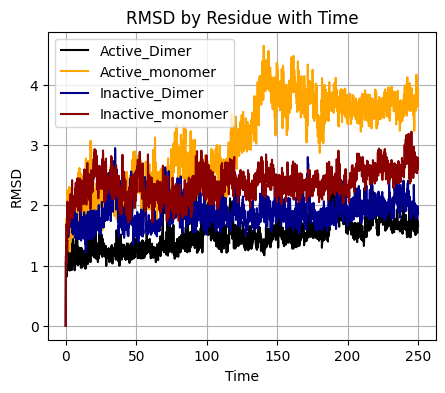

In [4]:
# Generate time axis for RMSD plot. The trajectory was saved every 0.002 ns, and we have 125000 steps.
# time = nsteps * dt
total_time = 125000000 * 0.002 /1000
time = np.linspace(0, total_time, len(dimer_3b3f_rmsd))

# Plot the data with time
%matplotlib inline
plt.figure(figsize=(5, 4))
plt.plot(time, dimer_3b3f_rmsd['perres'], label='Active_Dimer', color = 'black')
plt.plot(time, monomer_3b3f_rmsd['perres'], label='Active_monomer', color = 'orange')
plt.plot(time, dimer_3b3j_rmsd['perres'], label='Inactive_Dimer', color = 'darkblue')
plt.plot(time, monomer_3b3j_rmsd['perres'], label='Inactive_monomer', color = 'darkred')
plt.xlabel('Time')
plt.ylabel('RMSD')
plt.title('RMSD by Residue with Time')
plt.grid(True)
plt.legend()
plt.show()
#################################################################################

## PERRES AVERAGE

In [5]:
#Active
dimer_3b3f_rmsd_avg = pd.read_csv('../3b3f/dimer/analysis/3b3fdimerperresavg.dat', sep='\t', header=None)
monomer_3b3f_rmsd_avg = pd.read_csv('../3b3f/monomer/analysis/3b3fmonomerperresavg.dat', sep='\t', header=None)
#Inactive
dimer_3b3j_rmsd_avg = pd.read_csv('../3b3j/dimer/analysis/3b3jdimerperresavg.dat', sep='\t', header=None )
monomer_3b3j_rmsd_avg = pd.read_csv('../3b3j/monomer/analysis/3b3jmonomerperresavg.dat', sep='\t', header=None)

#Expanding the single column into the three columns
dimer_3b3f_rmsd_avg[['Residue', 'reference[Avg]', 'reference[Stdev]']] = dimer_3b3f_rmsd_avg[0].str.split(expand=True)
monomer_3b3f_rmsd_avg[['Residue', 'reference[Avg]', 'reference[Stdev]']] = monomer_3b3f_rmsd_avg[0].str.split(expand=True)
dimer_3b3j_rmsd_avg[['Residue', 'reference[Avg]', 'reference[Stdev]']] = dimer_3b3j_rmsd_avg[0].str.split(expand=True)
monomer_3b3j_rmsd_avg[['Residue', 'reference[Avg]', 'reference[Stdev]']] = monomer_3b3j_rmsd_avg[0].str.split(expand=True)

# Convert the 'Frame' and 'perres' columns to numeric
def convert_to_numeric(df):
    df['Residue'] = pd.to_numeric(df['Residue'], errors='coerce')
    df['reference[Avg]'] = pd.to_numeric(df['reference[Avg]'], errors='coerce')
    df['reference[Stdev]'] = pd.to_numeric(df['reference[Stdev]'], errors='coerce')
    return df

dimer_3b3f_rmsd_avg = convert_to_numeric(dimer_3b3f_rmsd_avg)
monomer_3b3f_rmsd_avg = convert_to_numeric(monomer_3b3f_rmsd_avg)
dimer_3b3j_rmsd_avg = convert_to_numeric(dimer_3b3j_rmsd_avg)
monomer_3b3j_rmsd_avg = convert_to_numeric(monomer_3b3j_rmsd_avg)

# removing the first null rows
dimer_3b3f_rmsd_avg = dimer_3b3f_rmsd_avg.drop(index=0)
monomer_3b3f_rmsd_avg = monomer_3b3f_rmsd_avg.drop(index=0)
dimer_3b3j_rmsd_avg = dimer_3b3j_rmsd_avg.drop(index=0)
monomer_3b3j_rmsd_avg = monomer_3b3j_rmsd_avg.drop(index=0)
# removing the first column
dimer_3b3f_rmsd_avg.drop(columns=dimer_3b3f_rmsd_avg.columns[0], axis=1, inplace=True)
monomer_3b3f_rmsd_avg.drop(columns=monomer_3b3f_rmsd_avg.columns[0], axis=1, inplace=True)
dimer_3b3j_rmsd_avg.drop(columns=dimer_3b3j_rmsd_avg.columns[0], axis=1, inplace=True)
monomer_3b3j_rmsd_avg.drop(columns=monomer_3b3j_rmsd_avg.columns[0], axis=1, inplace=True)
dimer_3b3f_rmsd_avg.head()

,Residue,reference[Avg],reference[Stdev]
1,1.0,10.1865,3.7557
2,2.0,9.0656,3.2496
3,3.0,4.4950,1.5500
4,4.0,3.3326,1.1539
5,5.0,3.3052,1.2783


In [6]:
##########################################################################################################################################
# Renumbering the residues Active dimer
# Define the length of the new numbering sequence
start_residue = 147
new_length = 332
# Reassign the 'Res' column to a new range of values
dimer_3b3f_rmsd_avg['Residue'] = np.tile(range(start_residue, start_residue + new_length), len(dimer_3b3f_rmsd_avg) // new_length + 1)[:len(dimer_3b3f_rmsd_avg)]
# Renumbering the residues Active monomer
start_residue = 147
new_length = 332
# Reassign the 'Res' column to a new range of values from 1 to 345
monomer_3b3f_rmsd_avg['Residue'] = np.tile(range(start_residue, start_residue + new_length), len(monomer_3b3f_rmsd_avg) // new_length + 1)[:len(monomer_3b3f_rmsd_avg)]

# Renumbering the residues Apo dimer
# Define the length of the new numbering sequence
start_residue_apo = 147
new_length_apo = 332
# Reassign the 'Res' column to a new range of values from 1 to 345
dimer_3b3j_rmsd_avg['Residue'] = np.tile(range(start_residue_apo, start_residue_apo + new_length_apo), len(dimer_3b3j_rmsd_avg) // new_length_apo + 1)[:len(dimer_3b3j_rmsd_avg)]

# Renumbering the residues Apo monomer
# Define the length of the new numbering sequence
start_residue_apo = 147
new_length_apo = 332
# Reassign the 'Res' column to a new range of values from 1 to 345
monomer_3b3j_rmsd_avg['Residue'] = np.tile(range(start_residue_apo, start_residue_apo + new_length_apo), len(monomer_3b3j_rmsd_avg) // new_length_apo + 1)[:len(monomer_3b3j_rmsd_avg)]
dimer_3b3f_rmsd_avg.head(), dimer_3b3f_rmsd_avg.tail()

(   Residue  reference[Avg]  reference[Stdev]
 1      147         10.1865            3.7557
 2      148          9.0656            3.2496
 3      149          4.4950            1.5500
 4      150          3.3326            1.1539
 5      151          3.3052            1.2783,
      Residue  reference[Avg]  reference[Stdev]
 660      474          2.1980            0.6681
 661      475          3.2728            1.6833
 662      476          2.0859            0.6375
 663      477          4.8677            2.6580
 664      478          5.8967            2.4223)

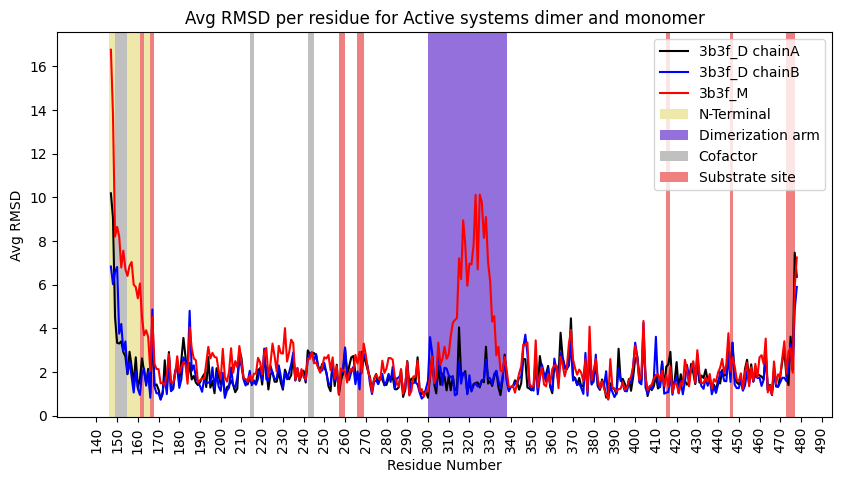

In [7]:
# Active RMSD plotting
start_indexA = 1
end_indexA = 332
res_rangeA1 = dimer_3b3f_rmsd_avg.loc[start_indexA:end_indexA, 'Residue']
RMSD_avg_rangeA1 = dimer_3b3f_rmsd_avg.loc[start_indexA:end_indexA, 'reference[Avg]']

start_indexB = 333
end_indexB = 664
res_rangeB1 = dimer_3b3f_rmsd_avg.loc[start_indexB:end_indexB, 'Residue']
RMSD_avg_rangeB1 = dimer_3b3f_rmsd_avg.loc[start_indexB:end_indexB, 'reference[Avg]']

%matplotlib inline
plt.figure(figsize=(10, 5))

plt.plot(res_rangeA1,RMSD_avg_rangeA1, color='black', label='3b3f_D chainA')
plt.plot(res_rangeB1,RMSD_avg_rangeB1, color='blue', label='3b3f_D chainB')

plt.plot(monomer_3b3f_rmsd_avg['Residue'], monomer_3b3f_rmsd_avg['reference[Avg]'], color='red', label='3b3f_M')

plt.axvspan(146,166, facecolor = 'palegoldenrod', label ='N-Terminal')
plt.axvspan(300,338, facecolor = 'mediumpurple', label ='Dimerization arm')
plt.axvspan(149,155, facecolor = 'silver', label ='Cofactor')
plt.axvspan(138,138, facecolor = 'silver')
plt.axvspan(160,160, facecolor = 'silver')
plt.axvspan(164,164, facecolor = 'silver')
plt.axvspan(169,169, facecolor = 'silver')
plt.axvspan(191,191, facecolor = 'silver')
plt.axvspan(193,193, facecolor = 'silver')
plt.axvspan(196,196, facecolor = 'silver')
plt.axvspan(214,216, facecolor = 'silver')
plt.axvspan(242,245, facecolor = 'silver')
plt.axvspan(272,272, facecolor = 'silver')
plt.axvspan(159,159, facecolor = 'lightcoral', label ='Substrate site')
plt.axvspan(146,146, facecolor = 'lightcoral')
plt.axvspan(161,163, facecolor = 'lightcoral')
plt.axvspan(166,168, facecolor = 'lightcoral')
plt.axvspan(257,260, facecolor = 'lightcoral')
plt.axvspan(262,262, facecolor = 'lightcoral')
plt.axvspan(266,269, facecolor = 'lightcoral')
plt.axvspan(287,287, facecolor = 'lightcoral')
plt.axvspan(415,417, facecolor = 'lightcoral')
plt.axvspan(446,447, facecolor = 'lightcoral')
plt.axvspan(473,477, facecolor = 'lightcoral')

plt.xlabel('Residue Number')
plt.ylabel('Avg RMSD')
plt.title('Avg RMSD per residue for Active systems dimer and monomer')
plt.legend()
#plt.grid(True)
plt.xticks(np.arange(140, 500, 10.0))
plt.xticks(rotation=90)
plt.show()

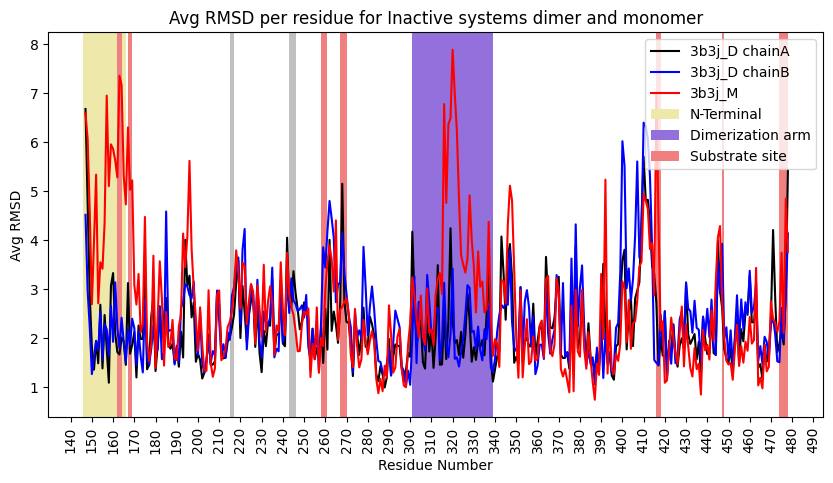

In [8]:
# Apo RMSD plotting
start_indexA_ApoD = 1
end_indexA_ApoD = 332
res_rangeA1_ApoD = dimer_3b3j_rmsd_avg.loc[start_indexA_ApoD:end_indexA_ApoD, 'Residue']
RMSD_avg_rangeA1_ApoD = dimer_3b3j_rmsd_avg.loc[start_indexA_ApoD:end_indexA_ApoD, 'reference[Avg]']


start_indexB_ApoD = 333
end_indexB_ApoD = 664
res_rangeB1_ApoD = dimer_3b3j_rmsd_avg.loc[start_indexB_ApoD:end_indexB_ApoD, 'Residue']
RMSD_avg_rangeB1_ApoD = dimer_3b3j_rmsd_avg.loc[start_indexB_ApoD:end_indexB_ApoD, 'reference[Avg]']
plt.figure(figsize=(10, 5))
plt.plot(res_rangeA1_ApoD,RMSD_avg_rangeA1_ApoD, color='black', label='3b3j_D chainA')
plt.plot(res_rangeB1_ApoD,RMSD_avg_rangeB1_ApoD, color='blue', label='3b3j_D chainB')
plt.plot(monomer_3b3j_rmsd_avg['Residue'], monomer_3b3j_rmsd_avg['reference[Avg]'], color='red', label='3b3j_M')
plt.axvspan(146,166, facecolor = 'palegoldenrod', label ='N-Terminal')
plt.axvspan(301,339, facecolor = 'mediumpurple', label ='Dimerization arm')
plt.axvspan(161,161, facecolor = 'silver')
plt.axvspan(165,165, facecolor = 'silver')
plt.axvspan(170,170, facecolor = 'silver')
plt.axvspan(192,192, facecolor = 'silver')
plt.axvspan(194,194, facecolor = 'silver')
plt.axvspan(197,197, facecolor = 'silver')
plt.axvspan(215,217, facecolor = 'silver')
plt.axvspan(243,246, facecolor = 'silver')
plt.axvspan(273,273, facecolor = 'silver')
plt.axvspan(160,160, facecolor = 'lightcoral', label ='Substrate site')
plt.axvspan(162,164, facecolor = 'lightcoral')
plt.axvspan(167,169, facecolor = 'lightcoral')
plt.axvspan(258,261, facecolor = 'lightcoral')
plt.axvspan(263,263, facecolor = 'lightcoral')
plt.axvspan(267,270, facecolor = 'lightcoral')
plt.axvspan(288,288, facecolor = 'lightcoral')
plt.axvspan(416,418, facecolor = 'lightcoral')
plt.axvspan(447,448, facecolor = 'lightcoral')
plt.axvspan(474,478, facecolor = 'lightcoral')


plt.xlabel('Residue Number')
plt.ylabel('Avg RMSD')
plt.title('Avg RMSD per residue for Inactive systems dimer and monomer')
plt.legend()
#plt.grid(True)
plt.xticks(np.arange(140, 500, 10.0))
plt.xticks(rotation=90)
plt.show()

# RMSF

In [9]:
# Reading the RMSF files run 1
dimer_3b3f_rmsf = pd.read_csv('../3b3f/dimer/analysis/rmsf_3b3f_dimer_250.dat', sep=r'\s+', header=None)
monomer_3b3f_rmsf = pd.read_csv('../3b3f/monomer/analysis/rmsf_3b3f_monomer_250.dat', sep=r'\s+', header=None)
dimer_3b3j_rmsf = pd.read_csv('../3b3j/dimer/analysis/rmsf_3b3j_dimer_250.dat', sep=r'\s+', header=None)
monomer_3b3j_rmsf = pd.read_csv('../3b3j/monomer/analysis/rmsf_3b3j_monomer_250.dat', sep=r'\s+', header=None)
#Assigning names to columns
dimer_3b3f_rmsf.columns = ['Res', 'AtomicFlx']
monomer_3b3f_rmsf.columns = ['Res', 'AtomicFlx']
dimer_3b3j_rmsf.columns = ['Res', 'AtomicFlx']
monomer_3b3j_rmsf.columns = ['Res', 'AtomicFlx']
# removing the first null rows
dimer_3b3f_rmsf= dimer_3b3f_rmsf.drop(index=0)
monomer_3b3f_rmsf = monomer_3b3f_rmsf.drop(index=0)
dimer_3b3j_rmsf =dimer_3b3j_rmsf.drop(index=0)
monomer_3b3j_rmsf = monomer_3b3j_rmsf.drop(index=0)
dimer_3b3f_rmsf.head(), dimer_3b3f_rmsf.tail()

(     Res AtomicFlx
 1  1.000    5.9642
 2  2.000    5.1237
 3  3.000    3.8114
 4  4.000    2.5610
 5  5.000    2.5763,
          Res AtomicFlx
 660  660.000    1.1391
 661  661.000    2.3582
 662  662.000    1.3795
 663  663.000    4.0953
 664  664.000    4.2499)

In [10]:
# Renumbering the residues Holo dimer
# Define the length of the new numbering sequence
start_residue = 147
new_length = 332
# Reassign the 'Res' column to a new range of values
dimer_3b3f_rmsf['Res'] = np.tile(range(start_residue, start_residue + new_length), len(dimer_3b3f_rmsf) // new_length + 1)[:len(dimer_3b3f_rmsf)]
# Renumbering the residues Holo monomer
start_residue = 147
new_length = 332
# Reassign the 'Res' column to a new range of values from 1 to 345
monomer_3b3f_rmsf['Res'] = np.tile(range(start_residue, start_residue + new_length), len(monomer_3b3f_rmsf) // new_length + 1)[:len(monomer_3b3f_rmsf)]

# Renumbering the residues Apo dimer
# Define the length of the new numbering sequence
start_residue_apo = 147
new_length_apo = 332
# Reassign the 'Res' column to a new range of values from 1 to 345
dimer_3b3j_rmsf['Res'] = np.tile(range(start_residue_apo, start_residue_apo + new_length_apo), len(dimer_3b3j_rmsf) // new_length_apo + 1)[:len(dimer_3b3j_rmsf)]

# Renumbering the residues Apo monomer
# Define the length of the new numbering sequence
start_residue_apo = 147
new_length_apo = 332
# Reassign the 'Res' column to a new range of values from 1 to 345
monomer_3b3j_rmsf['Res'] = np.tile(range(start_residue_apo, start_residue_apo + new_length_apo), len(monomer_3b3j_rmsf) // new_length_apo + 1)[:len(monomer_3b3j_rmsf)]
#######################################################################################################################################################
# Holo Dimer
# Adding chain dataframe
# Calculate the number of rows in the dataframe
num_rows = len(dimer_3b3f_rmsf)
# Create a list of values with half "value1" and half "value2"
half_length = num_rows // 2
values = ["chain_A"] * half_length + ["chain_B"] * (num_rows - half_length)
# Add the new column to the dataframe
dimer_3b3f_rmsf['Chain'] = values

## Holo Monomer
# Adding chain dataframe
valuesHM = ["chain_A"] * len(monomer_3b3f_rmsf)
# Add the new column to the dataframe
monomer_3b3f_rmsf['Chain'] = valuesHM

# Apo Dimer
# Adding chain dataframe
# Calculate the number of rows in the dataframe
num_rows_apo = len(dimer_3b3j_rmsf)
# Create a list of values with half "value1" and half "value2"
half_length_apo = num_rows_apo // 2
values_apo = ["chain_A"] * half_length_apo + ["chain_B"] * (num_rows_apo - half_length_apo)
# Add the new column to the dataframe
dimer_3b3j_rmsf ['Chain'] = values_apo

# Apo Monomer
# Adding chain dataframe
values_apoM = ["chain_A"] * len(monomer_3b3j_rmsf)
# Add the new column to the dataframe
monomer_3b3j_rmsf ['Chain'] = values_apoM

# Convert the "AtomicFlx" column to numeric
dimer_3b3f_rmsf["AtomicFlx"] = pd.to_numeric(dimer_3b3f_rmsf["AtomicFlx"], errors='coerce')
monomer_3b3f_rmsf["AtomicFlx"] = pd.to_numeric(monomer_3b3f_rmsf["AtomicFlx"], errors='coerce')
dimer_3b3j_rmsf["AtomicFlx"] = pd.to_numeric(dimer_3b3j_rmsf["AtomicFlx"], errors='coerce')
monomer_3b3j_rmsf["AtomicFlx"] = pd.to_numeric(monomer_3b3j_rmsf["AtomicFlx"], errors='coerce')
dimer_3b3f_rmsf.head(), dimer_3b3f_rmsf.tail(), monomer_3b3f_rmsf.head(), monomer_3b3f_rmsf.tail(), dimer_3b3j_rmsf.head(), dimer_3b3j_rmsf.tail(), monomer_3b3j_rmsf.head(), monomer_3b3j_rmsf.tail()
#######################################################################################################################################################

(   Res  AtomicFlx    Chain
 1  147     5.9642  chain_A
 2  148     5.1237  chain_A
 3  149     3.8114  chain_A
 4  150     2.5610  chain_A
 5  151     2.5763  chain_A,
      Res  AtomicFlx    Chain
 660  474     1.1391  chain_B
 661  475     2.3582  chain_B
 662  476     1.3795  chain_B
 663  477     4.0953  chain_B
 664  478     4.2499  chain_B,
    Res  AtomicFlx    Chain
 1  147     9.4399  chain_A
 2  148     7.9237  chain_A
 3  149     5.4411  chain_A
 4  150     5.3564  chain_A
 5  151     5.1532  chain_A,
      Res  AtomicFlx    Chain
 328  474     1.3681  chain_A
 329  475     2.0723  chain_A
 330  476     1.1563  chain_A
 331  477     2.9357  chain_A
 332  478     3.8036  chain_A,
    Res  AtomicFlx    Chain
 1  147     2.9900  chain_A
 2  148     2.2703  chain_A
 3  149     1.5197  chain_A
 4  150     1.0653  chain_A
 5  151     1.0364  chain_A,
      Res  AtomicFlx    Chain
 660  474     1.1026  chain_B
 661  475     1.0124  chain_B
 662  476     1.0800  chain_B
 663  477  

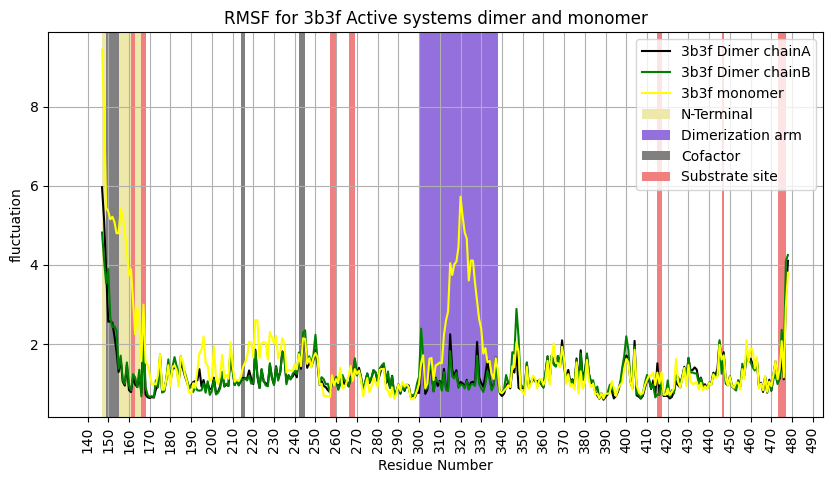

In [11]:
# Active RMSF plotting
%matplotlib inline
plt.figure(figsize=(10, 5))
start_indexA = 1
end_indexA = 332
res_rangeA1 = dimer_3b3f_rmsf.loc[start_indexA:end_indexA, 'Res']
fluct_rangeA1 = dimer_3b3f_rmsf.loc[start_indexA:end_indexA, 'AtomicFlx']
plt.plot(res_rangeA1,fluct_rangeA1, color='black', label='3b3f Dimer chainA')

start_indexB = 333
end_indexB = 664
res_rangeB1 = dimer_3b3f_rmsf.loc[start_indexB:end_indexB, 'Res']
fluct_rangeB1 = dimer_3b3f_rmsf.loc[start_indexB:end_indexB, 'AtomicFlx']
plt.plot(res_rangeB1,fluct_rangeB1, color='green', label='3b3f Dimer chainB')

plt.plot(monomer_3b3f_rmsf['Res'], monomer_3b3f_rmsf['AtomicFlx'], color='yellow', label='3b3f monomer')

plt.xlabel('Residue Number')
plt.axvspan(147,166, facecolor = 'palegoldenrod', label ='N-Terminal')
plt.axvspan(300,338, facecolor = 'mediumpurple', label ='Dimerization arm')
plt.axvspan(149,155, facecolor = 'grey', label ='Cofactor')
plt.axvspan(138,138, facecolor = 'grey')
plt.axvspan(160,160, facecolor = 'grey')
plt.axvspan(164,164, facecolor = 'grey')
plt.axvspan(169,169, facecolor = 'grey')
plt.axvspan(191,191, facecolor = 'grey')
plt.axvspan(193,193, facecolor = 'grey')
plt.axvspan(196,196, facecolor = 'grey')
plt.axvspan(214,216, facecolor = 'grey')
plt.axvspan(242,245, facecolor = 'grey')
plt.axvspan(272,272, facecolor = 'grey')
plt.axvspan(159,159, facecolor = 'lightcoral', label ='Substrate site')
plt.axvspan(146,146, facecolor = 'lightcoral')
plt.axvspan(161,163, facecolor = 'lightcoral')
plt.axvspan(166,168, facecolor = 'lightcoral')
plt.axvspan(257,260, facecolor = 'lightcoral')
plt.axvspan(262,262, facecolor = 'lightcoral')
plt.axvspan(266,269, facecolor = 'lightcoral')
plt.axvspan(287,287, facecolor = 'lightcoral')
plt.axvspan(415,417, facecolor = 'lightcoral')
plt.axvspan(446,447, facecolor = 'lightcoral')
plt.axvspan(473,477, facecolor = 'lightcoral')
plt.ylabel('fluctuation')
plt.title('RMSF for 3b3f Active systems dimer and monomer')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(140, 500, 10.0))
plt.xticks(rotation=90)
plt.show()
##############################################################################################################3


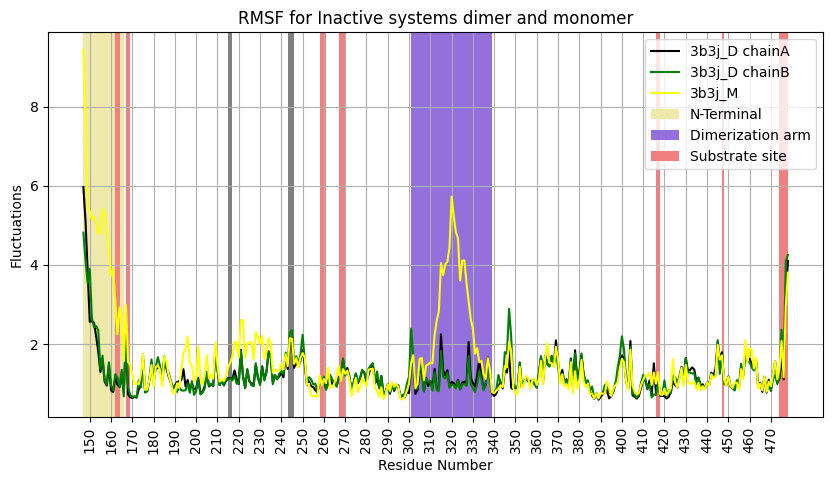

In [12]:
# Inactive RMSF plotting run 1
plt.figure(figsize=(10, 5))
start_index_apoA = 1
end_index_apoA = 332
res_range_apoA1 = dimer_3b3f_rmsf.loc[start_index_apoA:end_index_apoA, 'Res']
fluct_range_apoA1 = dimer_3b3f_rmsf.loc[start_index_apoA:end_index_apoA, 'AtomicFlx']
plt.plot(res_range_apoA1,fluct_range_apoA1, color='black', label='3b3j_D chainA')

start_index_apoB = 333
end_index_apoB = 664
res_range_apoB1 = dimer_3b3f_rmsf.loc[start_index_apoB:end_index_apoB, 'Res']
fluct_range_apoB1 = dimer_3b3f_rmsf.loc[start_index_apoB:end_index_apoB, 'AtomicFlx']
plt.plot(res_range_apoB1,fluct_range_apoB1, color='green', label='3b3j_D chainB')

plt.plot(monomer_3b3f_rmsf['Res'], monomer_3b3f_rmsf['AtomicFlx'], color='yellow', label='3b3j_M')

plt.xlabel('Residue Number')
plt.axvspan(147,166, facecolor = 'palegoldenrod', label ='N-Terminal')
plt.axvspan(301,339, facecolor = 'mediumpurple', label ='Dimerization arm')
plt.axvspan(161,161, facecolor = 'grey')
plt.axvspan(165,165, facecolor = 'grey')
plt.axvspan(170,170, facecolor = 'grey')
plt.axvspan(192,192, facecolor = 'grey')
plt.axvspan(194,194, facecolor = 'grey')
plt.axvspan(197,197, facecolor = 'grey')
plt.axvspan(215,217, facecolor = 'grey')
plt.axvspan(243,246, facecolor = 'grey')
plt.axvspan(273,273, facecolor = 'grey')
plt.axvspan(160,160, facecolor = 'lightcoral', label ='Substrate site')
plt.axvspan(162,164, facecolor = 'lightcoral')
plt.axvspan(167,169, facecolor = 'lightcoral')
plt.axvspan(258,261, facecolor = 'lightcoral')
plt.axvspan(263,263, facecolor = 'lightcoral')
plt.axvspan(267,270, facecolor = 'lightcoral')
plt.axvspan(288,288, facecolor = 'lightcoral')
plt.axvspan(416,418, facecolor = 'lightcoral')
plt.axvspan(447,448, facecolor = 'lightcoral')
plt.axvspan(474,478, facecolor = 'lightcoral')

plt.xlabel('Residue Number')
plt.ylabel('Fluctuations')
plt.title('RMSF for Inactive systems dimer and monomer')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(150, 480, 10.0))
plt.xticks(rotation=90)
threshold = 2
plt.show()

# Correlation

In [13]:
corrmat3b3fDimer=pd.read_csv('../3b3f/dimer/analysis/corr_3b3f_Dimer.dat',sep=r'\s+')
corrmat3b3fMonomer=pd.read_csv('../3b3f/monomer/analysis/corr_3b3f_monomer.dat',sep=r'\s+')
corrmat3b3jDimer=pd.read_csv('../3b3j/dimer/analysis/corr_3b3j_Dimer.dat',sep=r'\s+')
corrmat3b3jMonomer=pd.read_csv('../3b3j/monomer/analysis/corr_3b3j_monomer.dat',sep=r'\s+')
#Renaming the first column
corrmat3b3fDimer.rename(columns={'#Residue-Residue': 'R-R'}, inplace=True)
corrmat3b3fMonomer.rename(columns={'#Residue-Residue': 'R-R'}, inplace=True)
corrmat3b3jDimer.rename(columns={'#Residue-Residue': 'R-R'}, inplace=True)
corrmat3b3jMonomer.rename(columns={'#Residue-Residue': 'R-R'}, inplace=True)

corrFilesList= (corrmat3b3fDimer, corrmat3b3fMonomer, corrmat3b3jDimer,corrmat3b3jMonomer)
for df in corrFilesList:
    first_column_label = df.columns[0]  # Assuming the first column is at index 0
    df.drop(first_column_label, axis=1, inplace=True)
#corrmat3b3fDimer.head()
#corrmat3b3fMonomer.head()
#corrmat3b3jDimer.head()
#corrmat3b3jMonomer.head()
#pd.to_numeric(dimer_3b3f_rmsf["AtomicFlx"], errors='coerce')

In [14]:
# Generate new column names
new_column_names = [f"{i}A" for i in range(147, 479)]
#new_column_names.extend([f"{i}B" for i in range(147, 479)])
corrmat3b3fDimer.columns = new_column_names

# Generate new row names
new_row_names = [f"{i}A" for i in range(147, 479)]
#new_row_names.extend([f"{i}B" for i in range(147, 479)])
corrmat3b3fDimer.index = new_row_names

# Display the DataFrame with new column names
corrmat3b3fDimer.head()


,147A,148A,149A,150A,151A,152A,153A,154A,155A,156A,...,469A,470A,471A,472A,473A,474A,475A,476A,477A,478A
147A,0.0000,0.5908,0.4157,0.3046,0.2645,0.2735,0.2633,0.2243,0.2100,0.1794,...,0.1705,0.1516,0.2469,0.1996,0.1515,0.1039,0.0946,0.0688,0.0768,0.0645
148A,0.5908,0.0000,0.5990,0.3768,0.3506,0.3596,0.2996,0.2545,0.2308,0.2025,...,0.1829,0.1730,0.2544,0.1889,0.1335,0.0878,0.0871,0.0756,0.0577,0.0458
149A,0.4157,0.5990,0.0000,0.4633,0.4408,0.4854,0.3549,0.3366,0.2618,0.2351,...,0.1512,0.1398,0.2201,0.1612,0.1264,0.0799,0.0963,0.0654,0.0486,0.0590
150A,0.3046,0.3768,0.4633,0.0000,0.5363,0.4072,0.4317,0.4831,0.3509,0.2964,...,0.1567,0.1544,0.2138,0.1478,0.1124,0.0685,0.0681,0.0480,0.0566,0.0509
151A,0.2645,0.3506,0.4408,0.5363,0.0000,0.5143,0.3198,0.4410,0.3813,0.3047,...,0.1300,0.1249,0.1924,0.1265,0.0894,0.0670,0.0607,0.0429,0.0412,0.0455


In [15]:
#Rename the residues of the active monomer correlation dataframes
# Generate new column names
new_column_names3b3fM = [f"{i}A" for i in range(147, 479)]
corrmat3b3fMonomer.columns = new_column_names3b3fM
# Generate new row names
new_row_names3b3fM = [f"{i}A" for i in range(147, 479)]
corrmat3b3fMonomer.index = new_row_names3b3fM
 
# Display the DataFrame with new column names
corrmat3b3fMonomer.head()

,147A,148A,149A,150A,151A,152A,153A,154A,155A,156A,...,469A,470A,471A,472A,473A,474A,475A,476A,477A,478A
147A,0.0000,0.6735,0.4511,0.2918,0.2428,0.3177,0.2822,0.1833,0.1813,0.1868,...,0.0512,0.0497,0.0909,0.1105,0.1100,0.1064,0.1033,0.0818,0.0863,0.1101
148A,0.6735,0.0000,0.6373,0.4190,0.3874,0.5315,0.4396,0.3134,0.3263,0.3110,...,0.0806,0.0938,0.1293,0.1608,0.1628,0.1141,0.1177,0.0906,0.0961,0.1195
149A,0.4511,0.6373,0.0000,0.5052,0.4935,0.5563,0.4410,0.3736,0.3439,0.3038,...,0.1132,0.1404,0.1830,0.2036,0.2175,0.1119,0.1131,0.0784,0.0635,0.0886
150A,0.2918,0.4190,0.5052,0.0000,0.5168,0.4385,0.5301,0.4989,0.3988,0.3420,...,0.1277,0.1597,0.1797,0.2098,0.2366,0.1291,0.1564,0.1177,0.0826,0.1238
151A,0.2428,0.3874,0.4935,0.5168,0.0000,0.5512,0.3578,0.4731,0.4450,0.3436,...,0.0791,0.1018,0.1165,0.1335,0.1362,0.0496,0.0590,0.0400,0.0206,0.0344


In [16]:
# Generate new column names
new_column_names = [f"{i}A" for i in range(147, 479)]
new_column_names.extend([f"{i}B" for i in range(147, 479)])
corrmat3b3jDimer.columns = new_column_names

# Generate new row names
new_row_names = [f"{i}A" for i in range(147, 479)]
new_row_names.extend([f"{i}B" for i in range(147, 479)])
corrmat3b3jDimer.index = new_row_names

# Display the DataFrame with new column names
corrmat3b3jDimer.head()

,147A,148A,149A,150A,151A,152A,153A,154A,155A,156A,...,469B,470B,471B,472B,473B,474B,475B,476B,477B,478B
147A,0.0000,0.6199,0.4302,0.3291,0.2815,0.1602,0.1235,0.1024,0.1346,0.1359,...,0.0385,0.0160,0.0324,0.0337,0.0429,0.0150,0.0195,-0.0007,0.0151,-0.0020
148A,0.6199,0.0000,0.5800,0.5037,0.3808,0.2474,0.1940,0.1696,0.1913,0.2062,...,0.0365,0.0121,0.0314,0.0422,0.0356,0.0338,0.0180,-0.0052,0.0262,0.0021
149A,0.4302,0.5800,0.0000,0.5758,0.5269,0.3032,0.2491,0.2073,0.2464,0.2448,...,0.0642,0.0472,0.0632,0.0979,0.0828,0.0669,0.0653,0.0165,0.0421,0.0221
150A,0.3291,0.5037,0.5758,0.0000,0.5872,0.4122,0.3451,0.2987,0.3059,0.2791,...,0.0191,0.0064,0.0189,0.0622,0.0716,0.0524,0.0733,0.0206,0.0472,0.0325
151A,0.2815,0.3808,0.5269,0.5872,0.0000,0.5189,0.4025,0.3580,0.3958,0.3743,...,0.0624,0.0480,0.0654,0.1027,0.1181,0.1064,0.1156,0.0458,0.0790,0.0479


In [17]:
#Rename the residues of the Inactive monomer correlation dataframes
# Generate new column names
new_column_names3b3jM = [f"{i}A" for i in range(147, 479)]
corrmat3b3jMonomer.columns = new_column_names3b3jM
# Generate new row names
new_row_names3b3jM = [f"{i}A" for i in range(147, 479)]
corrmat3b3jMonomer.index = new_row_names3b3jM
 
# Display the DataFrame with new column names
corrmat3b3jMonomer.head()

,147A,148A,149A,150A,151A,152A,153A,154A,155A,156A,...,469A,470A,471A,472A,473A,474A,475A,476A,477A,478A
147A,0.0000,0.6210,0.4108,0.3624,0.2315,0.1381,0.0933,0.0691,0.0818,0.1186,...,0.0563,0.0402,0.0570,0.0689,0.0853,0.1582,0.2162,0.3526,0.3453,0.3789
148A,0.6210,0.0000,0.5298,0.5071,0.3061,0.1884,0.1507,0.1173,0.1323,0.1715,...,0.0766,0.0614,0.0810,0.1016,0.1215,0.2081,0.2635,0.4307,0.3696,0.3724
149A,0.4108,0.5298,0.0000,0.5713,0.4198,0.2556,0.1816,0.1588,0.1851,0.2112,...,0.0998,0.0966,0.1207,0.1514,0.1908,0.2695,0.3003,0.3796,0.4239,0.2939
150A,0.3624,0.5071,0.5713,0.0000,0.5349,0.3835,0.2880,0.2415,0.2782,0.2824,...,0.1808,0.1729,0.1800,0.2373,0.3022,0.4395,0.4231,0.5367,0.3711,0.2720
151A,0.2315,0.3061,0.4198,0.5349,0.0000,0.4420,0.3256,0.2774,0.3508,0.4042,...,0.1653,0.1878,0.1961,0.2361,0.3099,0.4259,0.4536,0.3796,0.4390,0.2545


In [18]:
#converting the dataframes to NumPy arrays to be visualized
corrmat3b3fDimer.to_numpy()
corrmat3b3fMonomer.to_numpy()
corrmat3b3jDimer.to_numpy()
corrmat3b3jMonomer.to_numpy()
print(corrmat3b3fDimer)

        147A    148A    149A    150A    151A    152A    153A    154A    155A  \
147A  0.0000  0.5908  0.4157  0.3046  0.2645  0.2735  0.2633  0.2243  0.2100   
148A  0.5908  0.0000  0.5990  0.3768  0.3506  0.3596  0.2996  0.2545  0.2308   
149A  0.4157  0.5990  0.0000  0.4633  0.4408  0.4854  0.3549  0.3366  0.2618   
150A  0.3046  0.3768  0.4633  0.0000  0.5363  0.4072  0.4317  0.4831  0.3509   
151A  0.2645  0.3506  0.4408  0.5363  0.0000  0.5143  0.3198  0.4410  0.3813   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
474A  0.1039  0.0878  0.0799  0.0685  0.0670  0.0532  0.0611  0.0378  0.0318   
475A  0.0946  0.0871  0.0963  0.0681  0.0607  0.0683  0.0647  0.0604  0.0487   
476A  0.0688  0.0756  0.0654  0.0480  0.0429  0.0425  0.0625  0.0368  0.0440   
477A  0.0768  0.0577  0.0486  0.0566  0.0412  0.0390  0.0690  0.0417  0.0404   
478A  0.0645  0.0458  0.0590  0.0509  0.0455  0.0455  0.0590  0.0348  0.0532   

        156A  ...    469A    470A    47

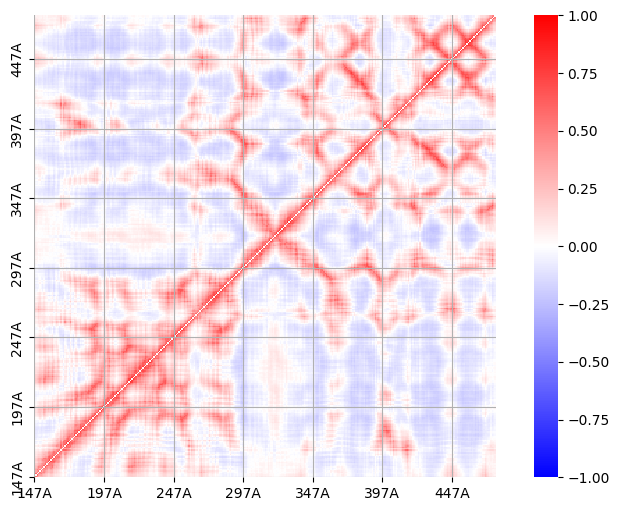

In [33]:
%matplotlib inline
# Create the heatmap
plt.figure(figsize=(10, 6))
plt.grid()
corrplot=sns.heatmap(corrmat3b3fDimer, center=0, xticklabels=50, yticklabels=50, square=True,cmap='bwr',vmin=-1, vmax=1)
# Get axes and invert x-axis  
ax = corrplot.axes
ax.invert_yaxis()
plt.show()

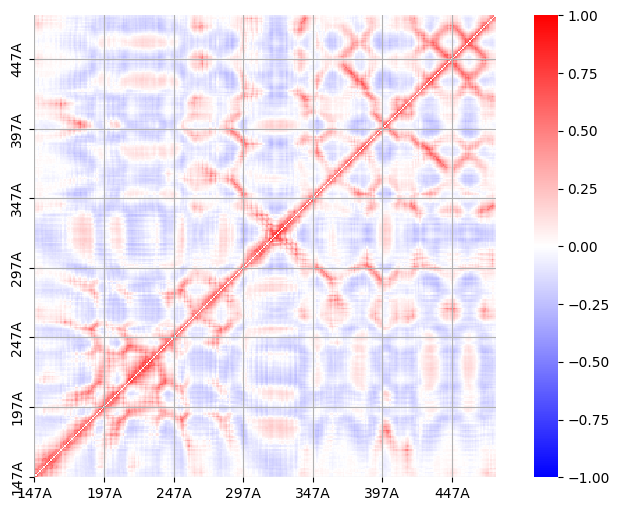

In [35]:
%matplotlib inline
# Create the heatmap
plt.figure(figsize=(10, 6))

corrplot=sns.heatmap(corrmat3b3fMonomer, center=0, xticklabels=50, yticklabels=50, square=True,cmap='bwr',vmin=-1, vmax=1)
plt.grid()
# Get axes and invert x-axis  
ax = corrplot.axes
ax.invert_yaxis()
plt.show()

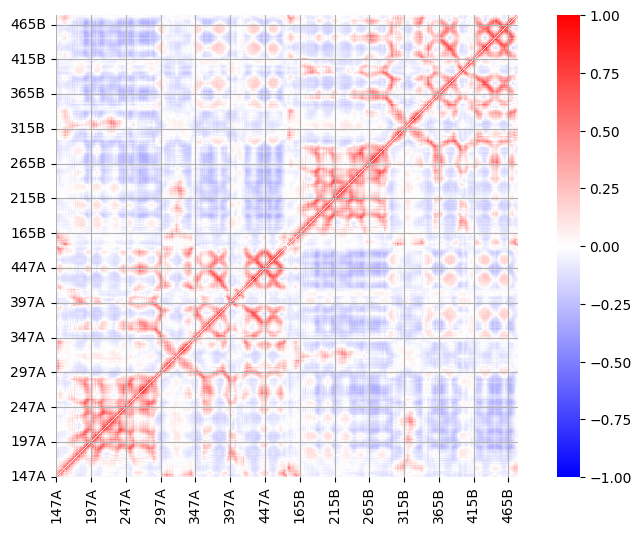

In [37]:
%matplotlib inline
# Create the heatmap
plt.figure(figsize=(10, 6))

corrplot=sns.heatmap(corrmat3b3jDimer, center=0, xticklabels=50, yticklabels=50, square=True,cmap='bwr',vmin=-1, vmax=1)
plt.grid()
# Get axes and invert x-axis  
ax = corrplot.axes
ax.invert_yaxis()
plt.show()

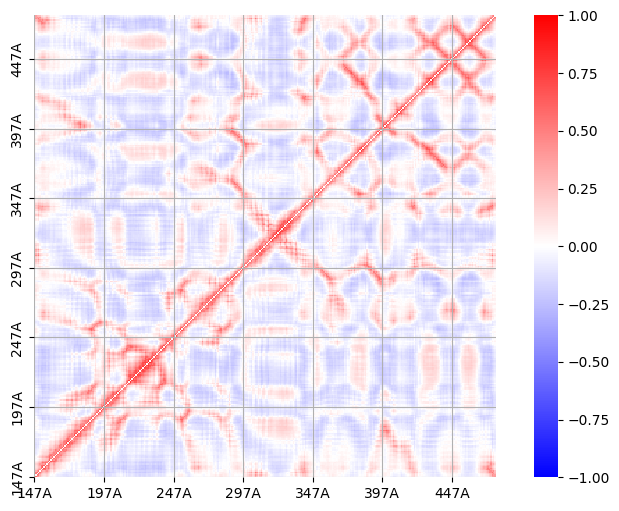

In [38]:
%matplotlib inline
# Create the heatmap
plt.figure(figsize=(10, 6))

corrplot=sns.heatmap(corrmat3b3jMonomer, center=0, xticklabels=50, yticklabels=50, square=True,cmap='bwr',vmin=-1, vmax=1)
plt.grid()
# Get axes and invert x-axis  
ax = corrplot.axes
ax.invert_yaxis()
plt.show()

# RoG

In [39]:
# Reading the RMSF files run 1
dimer_3b3f_rog = pd.read_csv('../3b3f/dimer/analysis/rog_3b3f_dimer_250.dat', sep=r'\s+', header=None)
monomer_3b3f_rog = pd.read_csv('../3b3f/monomer/analysis/rog_3b3f_monomer_250.dat', sep=r'\s+', header=None)
dimer_3b3j_rog = pd.read_csv('../3b3j/dimer/analysis/rog_3b3j_dimer_250.dat', sep=r'\s+', header=None)
monomer_3b3j_rog = pd.read_csv('../3b3j/monomer/analysis/rog_3b3j_monomer_250.dat', sep=r'\s+', header=None)
dimer_3b3f_rog.columns = ['Frames','Rog','Rog_max']
monomer_3b3f_rog.columns = ['Frames','Rog','Rog_max']
dimer_3b3j_rog.columns = ['Frames','Rog','Rog_max']
monomer_3b3j_rog.columns = ['Frames','Rog','Rog_max']
dimer_3b3f_rog = dimer_3b3f_rog.apply(pd.to_numeric, errors='coerce')
monomer_3b3f_rog = monomer_3b3f_rog.apply(pd.to_numeric, errors='coerce')
dimer_3b3j_rog = dimer_3b3j_rog.apply(pd.to_numeric, errors='coerce')
monomer_3b3j_rog = monomer_3b3j_rog.apply(pd.to_numeric, errors='coerce')

# Exclude the first row
dimer_3b3f_rog = dimer_3b3f_rog.iloc[1:]
monomer_3b3f_rog = monomer_3b3f_rog.iloc[1:]
dimer_3b3j_rog = dimer_3b3j_rog.iloc[1:]
monomer_3b3j_rog = monomer_3b3j_rog.iloc[1:]
dimer_3b3f_rog.head(), print(dimer_3b3f_rog.dtypes)

Frames     float64
Rog        float64
Rog_max    float64
dtype: object


(   Frames      Rog  Rog_max
 1     1.0  28.2120  38.8397
 2     2.0  28.4449  39.3383
 3     3.0  28.3568  39.7809
 4     4.0  28.2123  39.1319
 5     5.0  28.3739  38.6455,
 None)

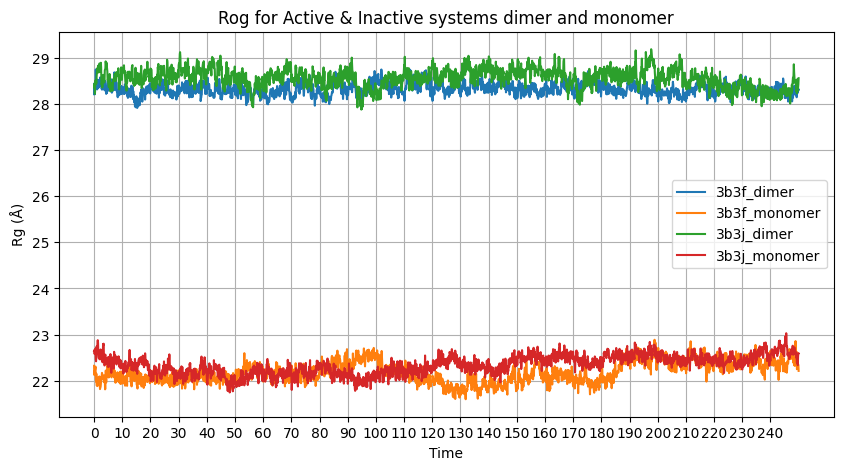

In [40]:
# Generate time axis for Rog plot. The trajectory was saved every 0.002 ns, and we have 125000 steps.
# time = nsteps * dt
total_time = 125000000 * 0.002 /1000
time = np.linspace(0, total_time, len(dimer_3b3f_rog))

%matplotlib inline
plt.figure(figsize=(10, 5))
plt.plot(time, dimer_3b3f_rog['Rog'], label='3b3f_dimer')
plt.plot(time, monomer_3b3f_rog['Rog'], label='3b3f_monomer')
plt.plot(time, dimer_3b3j_rog['Rog'], label='3b3j_dimer')
plt.plot(time, monomer_3b3j_rog['Rog'], label='3b3j_monomer')
plt.xlabel('Time')
plt.ylabel('Rg (Å)')
plt.title('Rog for Active & Inactive systems dimer and monomer')
plt.legend()
plt.xticks(np.arange(0, 250, 10.0))
plt.grid(True)
plt.show()

## PCA

In [2]:
#pca files
HD_run1_gamd_pca1 = pd.read_csv('HD/pcaHD1.dat', sep=r'\s+')
HM_run1_gamd_pca1 = pd.read_csv('HM/pcaHM1.dat', sep=r'\s+')
ApoD_run1_gamd_pca1 = pd.read_csv('ApoD/pcaApoD1.dat', sep=r'\s+')
ApoM_run1_gamd_pca1 = pd.read_csv('ApoM/pcaApoM1.dat', sep=r'\s+')
HD_run1_gamd_pca1.head(), print(HD_run1_gamd_pca1.dtypes)

#Frame      int64
Mode1     float64
Mode2     float64
Mode3     float64
Mode4     float64
Mode5     float64
Mode6     float64
Mode7     float64
Mode8     float64
Mode9     float64
Mode10    float64
dtype: object


(   #Frame   Mode1   Mode2  Mode3   Mode4   Mode5   Mode6   Mode7  Mode8  \
 0       1 -29.789  14.301 -3.271   4.961  10.347  15.073  -8.286  8.063   
 1       2 -27.533  11.459 -2.807   4.734   0.743   3.873  -8.271  1.195   
 2       3 -24.652   3.836 -1.337   9.149   8.322   6.364  -6.599  3.967   
 3       4 -23.526   5.460 -1.964  12.525   6.562  15.566 -11.511  7.031   
 4       5 -23.058  11.058 -4.283  14.823   8.951  13.316 -11.193  4.057   
 
     Mode9  Mode10  
 0   2.822   6.310  
 1   9.161   9.206  
 2   9.186   7.730  
 3  11.728   2.167  
 4   7.538   3.189  ,
 None)

In [1]:
# PLOTTING HD runs PCA
%matplotlib inline
# List of filenames
PCA_HD_dfs = [HD_run1_gamd_pca1]
# Define high_density_frames list
high_density_frames = []
# Iterate over the dat files
for i, df in enumerate(PCA_HD_dfs, start=1):
    pc1 = df['Mode1']
    pc2 = df['Mode2']
    xy = np.vstack([pc1, pc2])
    z = gaussian_kde(xy)(xy)
    # Get the indices of the points with the lowest density
    lowest_density_indices = np.argsort(z)[:1]  # Change 1 to the number of points you want to print
    highest_density_index = np.argmax(z)
    # Calculate the index of the density value closest to the mean density
    mean_density_index = np.abs(z - np.mean(z)).argmin()

    # Get the indices of the points with the density value higher than 0.0004
    high_density_indices = np.where(z > 0.0006)[0]
    
    # Create the scatter plot
    fig, ax = plt.subplots()
    ax2=ax.scatter(pc1, pc2, c=z, s=5, cmap='viridis')

    # Highlight the lowest density points
    ax.scatter(pc1[lowest_density_indices], pc2[lowest_density_indices], c='red', marker='x', label='Lowest Density')

    # Highlight the highest density point
    ax.scatter(pc1[highest_density_index], pc2[highest_density_index], c='blue', marker='x', label='Highest Density')

    # Highlight the mean density point
    ax.scatter(pc1[mean_density_index], pc2[mean_density_index], c='green', marker='x', label='Mean Density')


    # Set plot properties
    plt.xlabel('pc1', fontsize=14)
    plt.ylabel('pc2', fontsize=14)
    plt.title(f'HD run {i} PCA', fontsize=20)  # Use f-string to include the run number in the title

    # Display the plot in the Jupyter Notebook'
    bar = plt.colorbar(ax2)
    bar.set_label('Density')
    plt.grid()
    plt.show()
    # Save the plot to an image file
    plt.savefig(f'HD run {i} PCA' + '.png')

    # Print the conformation numbers with the lowest density
    print(f"Conformation numbers with lowest density in run {i}: {lowest_density_indices}")
    print(f"Conformation number with highest density in run {i}: { highest_density_index}")
    print(f"Conformation number of the mean density in run {i}: {mean_density_index}")

NameError: name 'HD_run1_gamd_pca1' is not defined

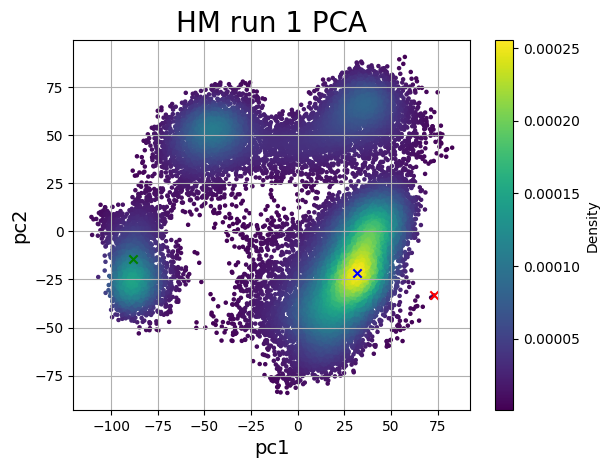

Conformation numbers with lowest density in run 1: [13369]
Conformation number with highest density in run 1: 5484
Conformation number of the mean density in run 1: 23931


<Figure size 640x480 with 0 Axes>

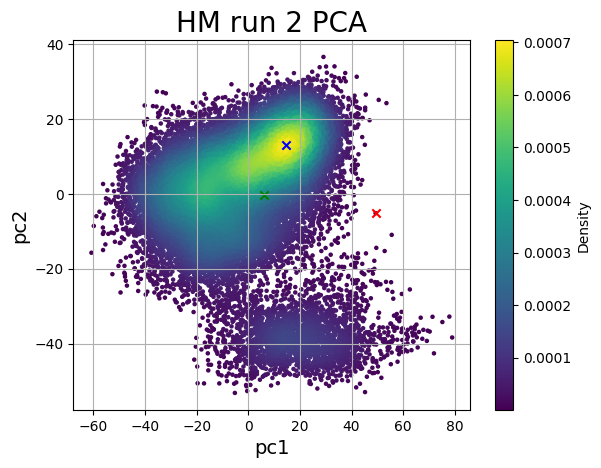

Conformation numbers with lowest density in run 2: [16999]
Conformation number with highest density in run 2: 18712
Conformation number of the mean density in run 2: 14059


<Figure size 640x480 with 0 Axes>

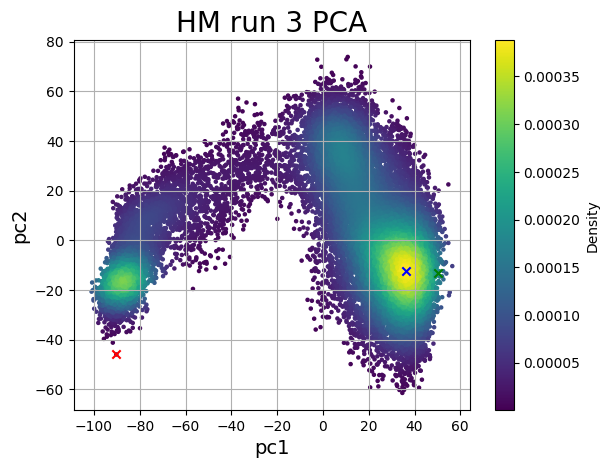

Conformation numbers with lowest density in run 3: [22580]
Conformation number with highest density in run 3: 14649
Conformation number of the mean density in run 3: 11358


<Figure size 640x480 with 0 Axes>

In [112]:
# PLOTTING HM runs PCA
# List of filenames
PCA_HM_dfs = [HM_run1_gamd_pca1]

# Iterate over the dat files
for i, dfHM in enumerate(PCA_HM_dfs, start=1):
    pc1HM = dfHM['Mode1']
    pc2HM = dfHM['Mode2']
    xyHM = np.vstack([pc1HM, pc2HM])
    zHM = gaussian_kde(xyHM)(xyHM)
    # Get the indices of the points with the lowest density
    lowest_density_indicesHM = np.argsort(zHM)[:1]  # Change 1 to the number of points you want to print
    highest_density_indexHM = np.argmax(zHM)
    # Calculate the index of the density value closest to the mean density
    mean_density_indexHM = np.abs(zHM - np.mean(zHM)).argmin()
    
    # Create the scatter plot
    fig, axHM = plt.subplots()
    axHM2=axHM.scatter(pc1HM, pc2HM, c=zHM, s=5, cmap='viridis')

    # Highlight the lowest density points
    axHM.scatter(pc1HM[lowest_density_indicesHM], pc2HM[lowest_density_indicesHM], c='red', marker='x', label='Lowest Density')

    # Highlight the highest density point
    axHM.scatter(pc1HM[highest_density_indexHM], pc2HM[highest_density_indexHM], c='blue', marker='x', label='Highest Density')

    # Highlight the mean density point
    axHM.scatter(pc1HM[mean_density_indexHM], pc2HM[mean_density_indexHM], c='green', marker='x', label='Mean Density')


    # Set plot properties
    plt.xlabel('pc1', fontsize=14)
    plt.ylabel('pc2', fontsize=14)
    plt.title(f'HM run {i} PCA', fontsize=20)  # Use f-string to include the run number in the title

    # Display the plot in the Jupyter Notebook'
    barHM = plt.colorbar(axHM2)
    barHM.set_label('Density')
    plt.grid()
    plt.show()
    # Save the plot to an image file
    plt.savefig(f'HM run {i} PCA' + '.png')

    # Print the conformation numbers with the lowest density
    print(f"Conformation numbers with lowest density in run {i}: {lowest_density_indicesHM}")
    print(f"Conformation number with highest density in run {i}: { highest_density_indexHM}")
    print(f"Conformation number of the mean density in run {i}: {mean_density_indexHM}")

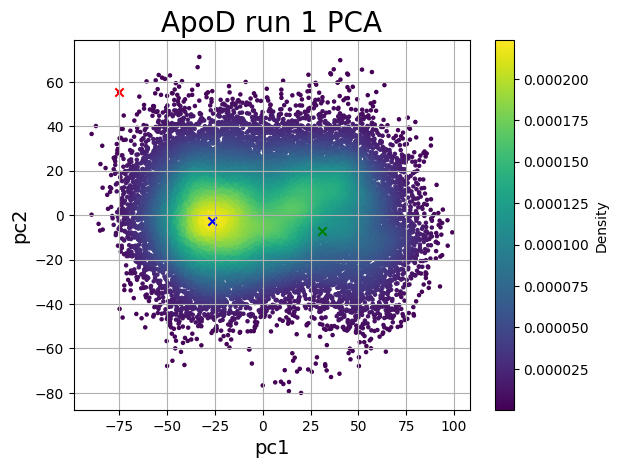

Conformation numbers with lowest density in run 1: [21870]
Conformation number with highest density in run 1: 19806
Conformation number of the mean density in run 1: 5514


<Figure size 640x480 with 0 Axes>

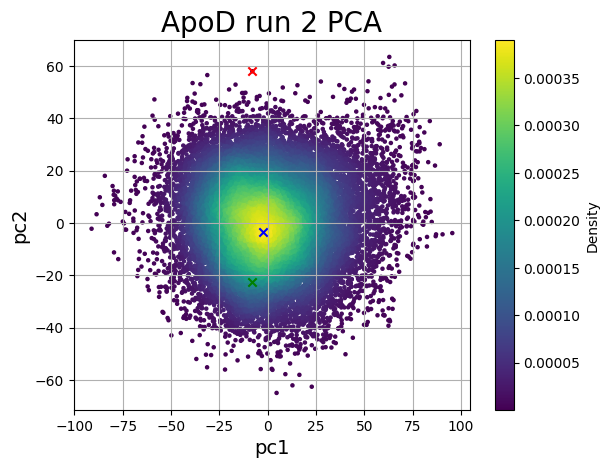

Conformation numbers with lowest density in run 2: [5428]
Conformation number with highest density in run 2: 22865
Conformation number of the mean density in run 2: 10566


<Figure size 640x480 with 0 Axes>

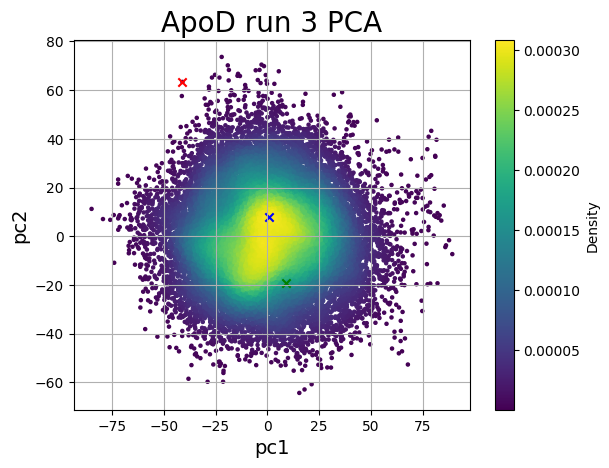

Conformation numbers with lowest density in run 3: [9311]
Conformation number with highest density in run 3: 24170
Conformation number of the mean density in run 3: 4506


<Figure size 640x480 with 0 Axes>

In [113]:
# PLOTTING ApoD runs PCA
# List of filenames
PCA_ApoD_dfs = [ApoD_run1_gamd_pca1]

# Iterate over the dat files
for i, dfApoD in enumerate(PCA_ApoD_dfs, start=1):
    pc1ApoD = dfApoD['Mode1']
    pc2ApoD = dfApoD['Mode2']
    xyApoD = np.vstack([pc1ApoD, pc2ApoD])
    zApoD = gaussian_kde(xyApoD)(xyApoD)
    # Get the indices of the points with the lowest density
    lowest_density_indicesApoD = np.argsort(zApoD)[:1]  # Change 1 to the number of points you want to print
    highest_density_indexApoD = np.argmax(zApoD)
    # Calculate the index of the density value closest to the mean density
    mean_density_indexApoD = np.abs(zApoD - np.mean(zApoD)).argmin()
    
    # Create the scatter plot
    fig, axApoD = plt.subplots()
    axApoD2=axApoD.scatter(pc1ApoD, pc2ApoD, c=zApoD, s=5, cmap='viridis')

    # Highlight the lowest density points
    axApoD.scatter(pc1ApoD[lowest_density_indicesApoD], pc2ApoD[lowest_density_indicesApoD], c='red', marker='x', label='Lowest Density')

    # Highlight the highest density point
    axApoD.scatter(pc1ApoD[highest_density_indexApoD], pc2ApoD[highest_density_indexApoD], c='blue', marker='x', label='Highest Density')

    # Highlight the mean density point
    axApoD.scatter(pc1ApoD[mean_density_indexApoD], pc2ApoD[mean_density_indexApoD], c='green', marker='x', label='Mean Density')


    # Set plot properties
    plt.xlabel('pc1', fontsize=14)
    plt.ylabel('pc2', fontsize=14)
    plt.title(f'ApoD run {i} PCA', fontsize=20)  # Use f-string to include the run number in the title

    # Display the plot in the Jupyter Notebook'
    barApoD = plt.colorbar(axApoD2)
    barApoD.set_label('Density')
    plt.grid()
    plt.show()
    # Save the plot to an image file
    plt.savefig(f'ApoD run {i} PCA' + '.png')

    # Print the conformation numbers with the lowest density
    print(f"Conformation numbers with lowest density in run {i}: {lowest_density_indicesApoD}")
    print(f"Conformation number with highest density in run {i}: { highest_density_indexApoD}")
    print(f"Conformation number of the mean density in run {i}: {mean_density_indexApoD}")

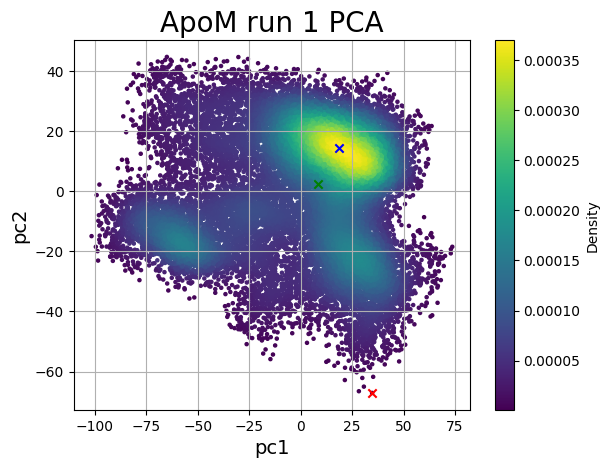

Conformation numbers with lowest density in run 1: [1779]
Conformation number with highest density in run 1: 16739
Conformation number of the mean density in run 1: 8229


<Figure size 640x480 with 0 Axes>

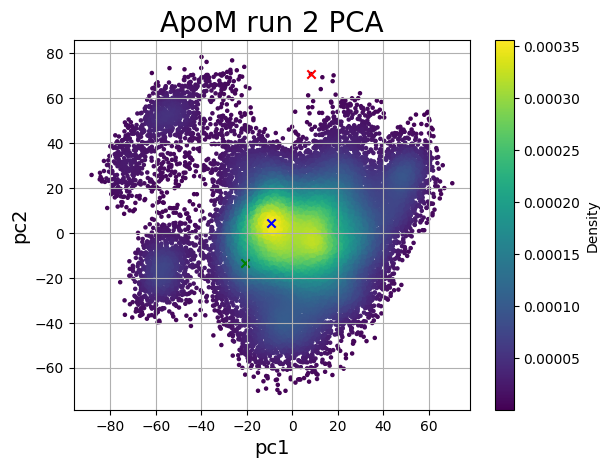

Conformation numbers with lowest density in run 2: [19861]
Conformation number with highest density in run 2: 5088
Conformation number of the mean density in run 2: 4484


<Figure size 640x480 with 0 Axes>

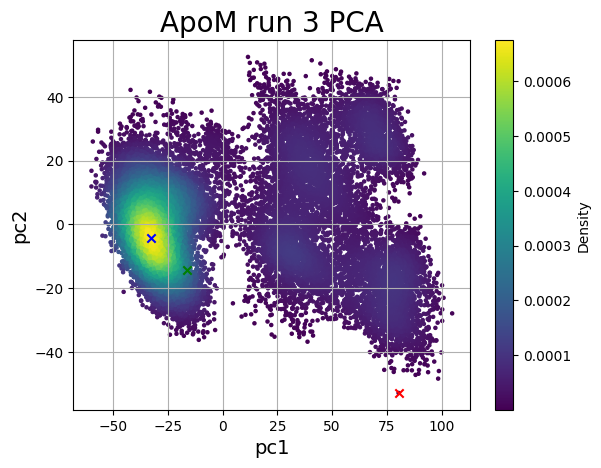

Conformation numbers with lowest density in run 3: [2322]
Conformation number with highest density in run 3: 14756
Conformation number of the mean density in run 3: 16876


<Figure size 640x480 with 0 Axes>

In [114]:
# PLOTTING ApoM runs PCA
# List of filenames
PCA_ApoM_dfs = [ApoM_run1_gamd_pca1]

# Iterate over the dat files
for i, dfApoM in enumerate(PCA_ApoM_dfs, start=1):
    pc1ApoM = dfApoM['Mode1']
    pc2ApoM = dfApoM['Mode2']
    xyApoM = np.vstack([pc1ApoM, pc2ApoM])
    zApoM = gaussian_kde(xyApoM)(xyApoM)
    # Get the indices of the points with the lowest density
    lowest_density_indicesApoM = np.argsort(zApoM)[:1]  # Change 1 to the number of points you want to print
    highest_density_indexApoM = np.argmax(zApoM)
    # Calculate the index of the density value closest to the mean density
    mean_density_indexApoM = np.abs(zApoM - np.mean(zApoM)).argmin()
    
    # Create the scatter plot
    fig, axApoM = plt.subplots()
    axApoM2=axApoM.scatter(pc1ApoM, pc2ApoM, c=zApoM, s=5, cmap='viridis')

    # Highlight the lowest density points
    axApoM.scatter(pc1ApoM[lowest_density_indicesApoM], pc2ApoM[lowest_density_indicesApoM], c='red', marker='x', label='Lowest Density')

    # Highlight the highest density point
    axApoM.scatter(pc1ApoM[highest_density_indexApoM], pc2ApoM[highest_density_indexApoM], c='blue', marker='x', label='Highest Density')

    # Highlight the mean density point
    axApoM.scatter(pc1ApoM[mean_density_indexApoM], pc2ApoM[mean_density_indexApoM], c='green', marker='x', label='Mean Density')


    # Set plot properties
    plt.xlabel('pc1', fontsize=14)
    plt.ylabel('pc2', fontsize=14)
    plt.title(f'ApoM run {i} PCA', fontsize=20)  # Use f-string to include the run number in the title

    # Display the plot in the Jupyter Notebook'
    barApoM = plt.colorbar(axApoM2)
    barApoM.set_label('Density')
    plt.grid()
    plt.show()
    # Save the plot to an image file
    plt.savefig(f'ApoM run {i} PCA' + '.png')

    # Print the conformation numbers with the lowest density
    print(f"Conformation numbers with lowest density in run {i}: {lowest_density_indicesApoM}")
    print(f"Conformation number with highest density in run {i}: { highest_density_indexApoM}")
    print(f"Conformation number of the mean density in run {i}: {mean_density_indexApoM}")